In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

### Read and Understand the data

In [300]:
# read data csv file
df = pd.read_csv('/home/pravin/Documents/Python_bases/bank/bankdata.csv',delimiter=',')

In [301]:
# check data columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [303]:
# check data rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [305]:
# check data size (Rows=614 and Columns=13)
df.shape

(614, 13)

In [306]:
# check concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [307]:
# check null values of each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [308]:
#Displays all details of descriptive analysis on data

import pandas_profiling
report = pandas_profiling.ProfileReport(df)
display(report)

### Univariate analysis

In [309]:
# check loan_id duplicate count
df['Loan_ID'].duplicated().sum()

0

In [310]:
# Displays the statistic details or descriptive statistics of each numeric variable
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [311]:
df_num = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


In [312]:
df_num.mode()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,2500,0.0,120.0,360.0


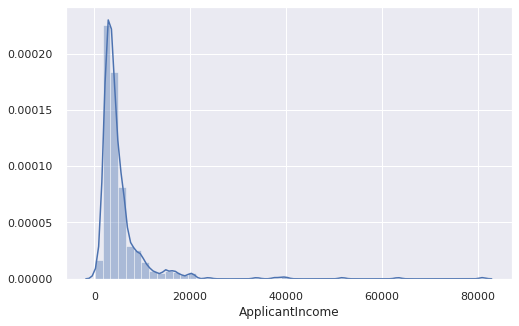

In [315]:
# check data distribution of Applicant Income
plt.figure(figsize=(8,5))
sns.distplot( df["ApplicantIncome"])
plt.show()

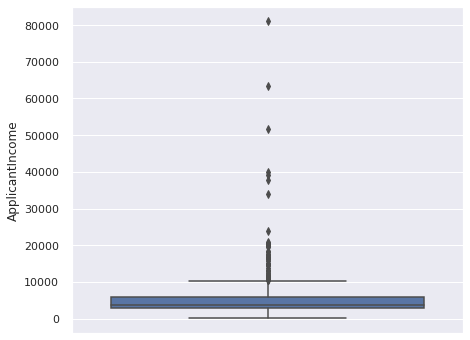

In [316]:
plt.figure(figsize=(7,6))
sns.boxplot(y=df['ApplicantIncome'])
plt.show()

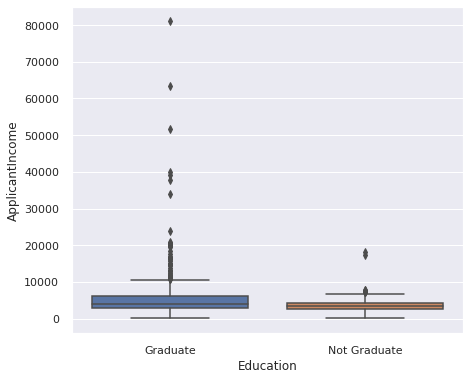

In [317]:
plt.figure(figsize=(7,6))
sns.boxplot(x=df['Education'],y=df['ApplicantIncome'])
plt.show()

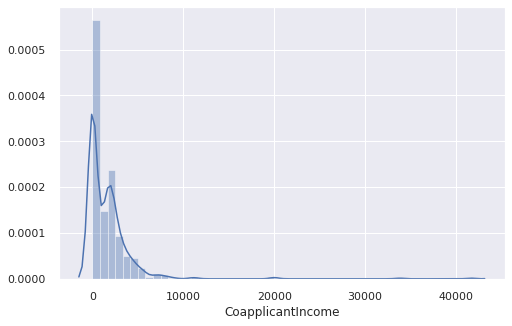

In [318]:
# check data distribution of CoapplicantIncome Income
plt.figure(figsize=(8,5))
sns.distplot( df["CoapplicantIncome"])
plt.show()

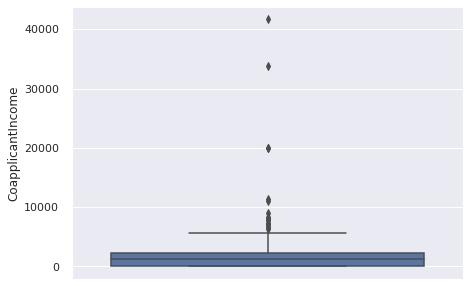

In [319]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df['CoapplicantIncome'])
plt.show()

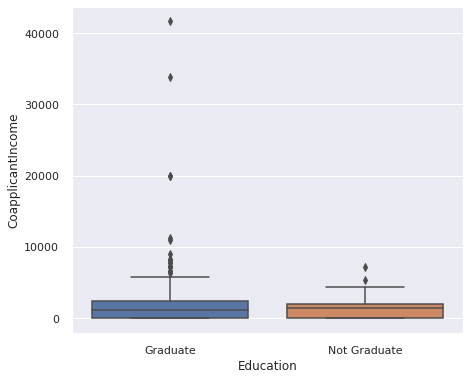

In [320]:
plt.figure(figsize=(7,6))
sns.boxplot(x=df['Education'],y=df['CoapplicantIncome'])
plt.show()

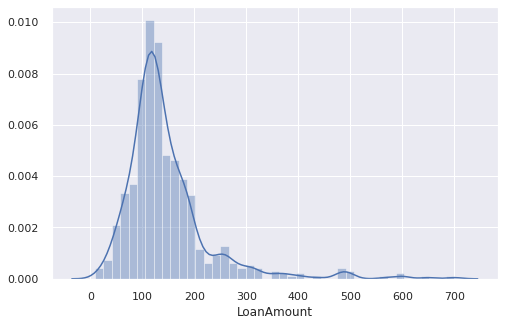

In [321]:
# check data distribution of LoanAmount Income
plt.figure(figsize=(8,5))
sns.distplot( df["LoanAmount"])
plt.show()

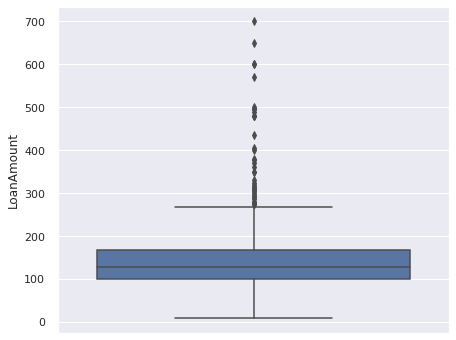

In [322]:
plt.figure(figsize=(7,6))
sns.boxplot(y=df['LoanAmount'])
plt.show()

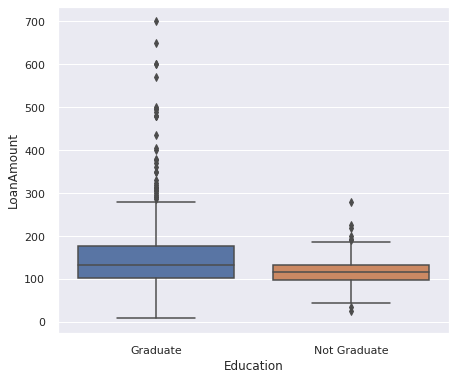

In [323]:
plt.figure(figsize=(7,6))
sns.boxplot(x=df['Education'],y=df['LoanAmount'])
plt.show()

In [324]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [325]:
# check target variable count
print(df['Loan_Status'].value_counts())
print(df['Loan_Status'].value_counts(normalize=True))

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


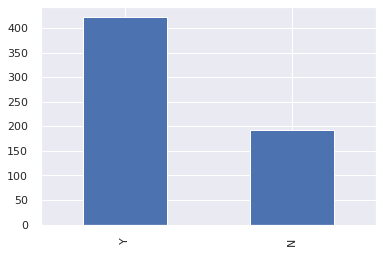

In [326]:
df['Loan_Status'].value_counts().plot.bar()

### bivariate analysis

In [327]:
#Relationship between two variables

# Gender
pd.crosstab(df['Loan_Status'], df['Gender'])

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


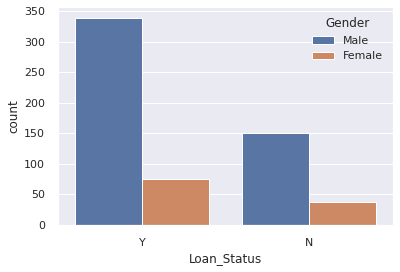

In [328]:
sns.countplot(x="Loan_Status", hue = "Gender", data = df)

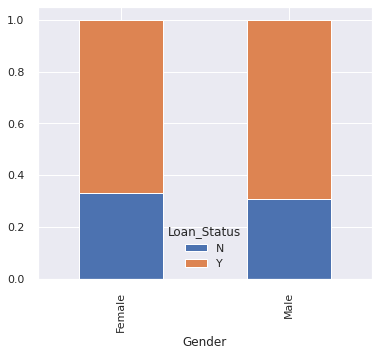

In [329]:
gender = pd.crosstab(df['Gender'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))

In [330]:
# Dependents
pd.crosstab(df['Loan_Status'], df['Dependents'])

Dependents,0,1,2,3+
Loan_Status,,,,
N,107,36,25,18
Y,238,66,76,33


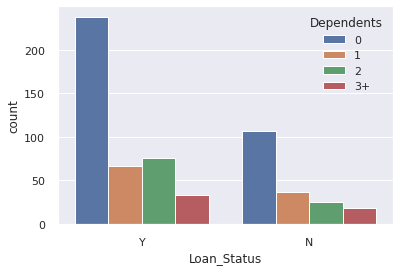

In [331]:
sns.countplot(x="Loan_Status", hue = "Dependents", data = df)

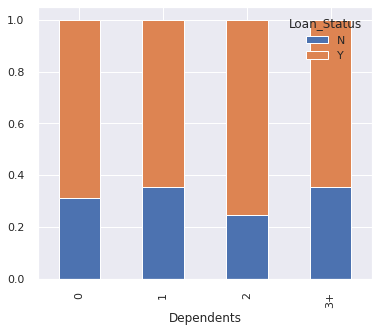

In [332]:
Dependents = pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))

In [333]:
# Married
pd.crosstab(df['Loan_Status'], df['Married'])

Married,No,Yes
Loan_Status,,
N,79,113
Y,134,285


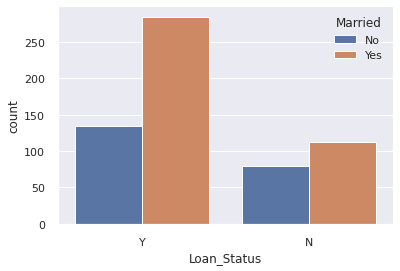

In [334]:
sns.countplot(x="Loan_Status", hue = "Married", data = df)

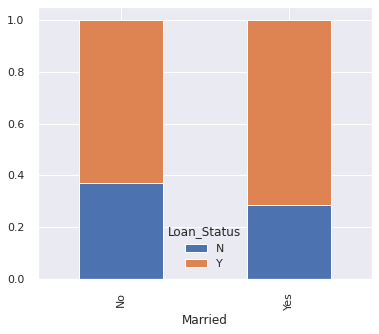

In [335]:
gender = pd.crosstab(df['Married'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))

In [336]:
# Education
pd.crosstab(df['Loan_Status'], df['Education'])

Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


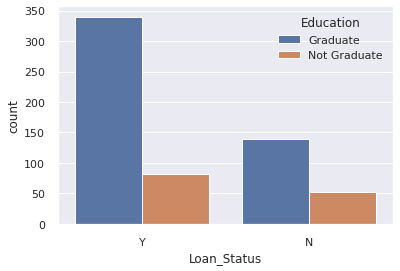

In [337]:
sns.countplot(x="Loan_Status", hue = "Education", data = df)

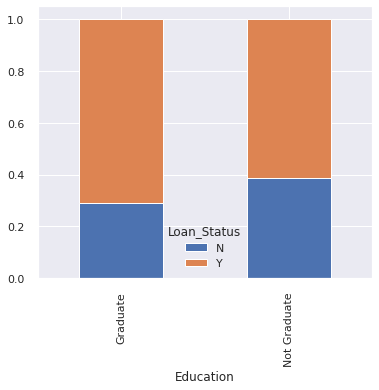

In [338]:
gender = pd.crosstab(df['Education'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))

In [339]:
# Self_Employed
pd.crosstab(df['Loan_Status'], df['Self_Employed'])

Self_Employed,No,Yes
Loan_Status,,
N,157,26
Y,343,56


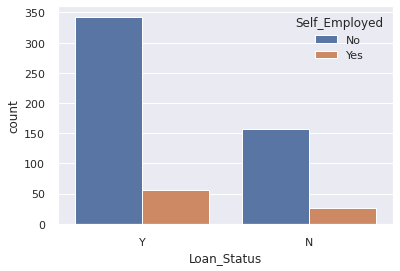

In [340]:
sns.countplot(x="Loan_Status", hue = "Self_Employed", data = df)

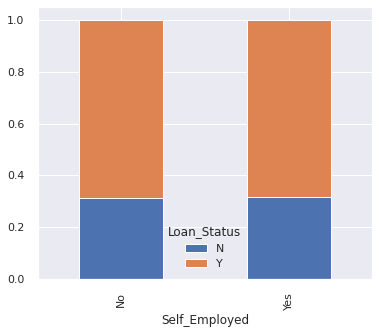

In [341]:
gender = pd.crosstab(df['Self_Employed'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))

In [342]:
# Credit_History
pd.crosstab(df['Loan_Status'], df['Credit_History'])

Credit_History,0.0,1.0
Loan_Status,,
N,82,97
Y,7,378


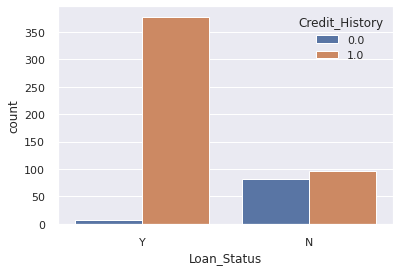

In [343]:
sns.countplot(x="Loan_Status", hue = "Credit_History", data = df)

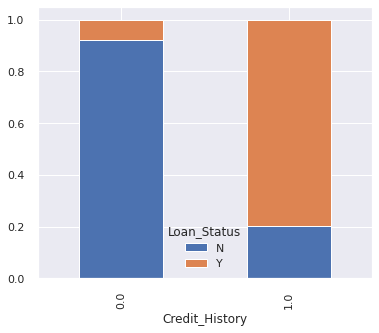

In [344]:
gender = pd.crosstab(df['Credit_History'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))

In [345]:
# Property_Area
pd.crosstab(df['Loan_Status'], df['Property_Area'])

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,69,54,69
Y,110,179,133


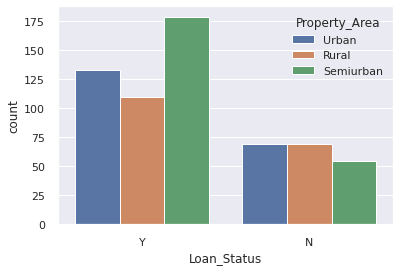

In [346]:
sns.countplot(x="Loan_Status", hue = "Property_Area", data = df)

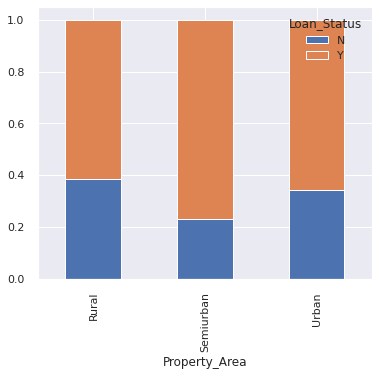

In [347]:
gender = pd.crosstab(df['Property_Area'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))

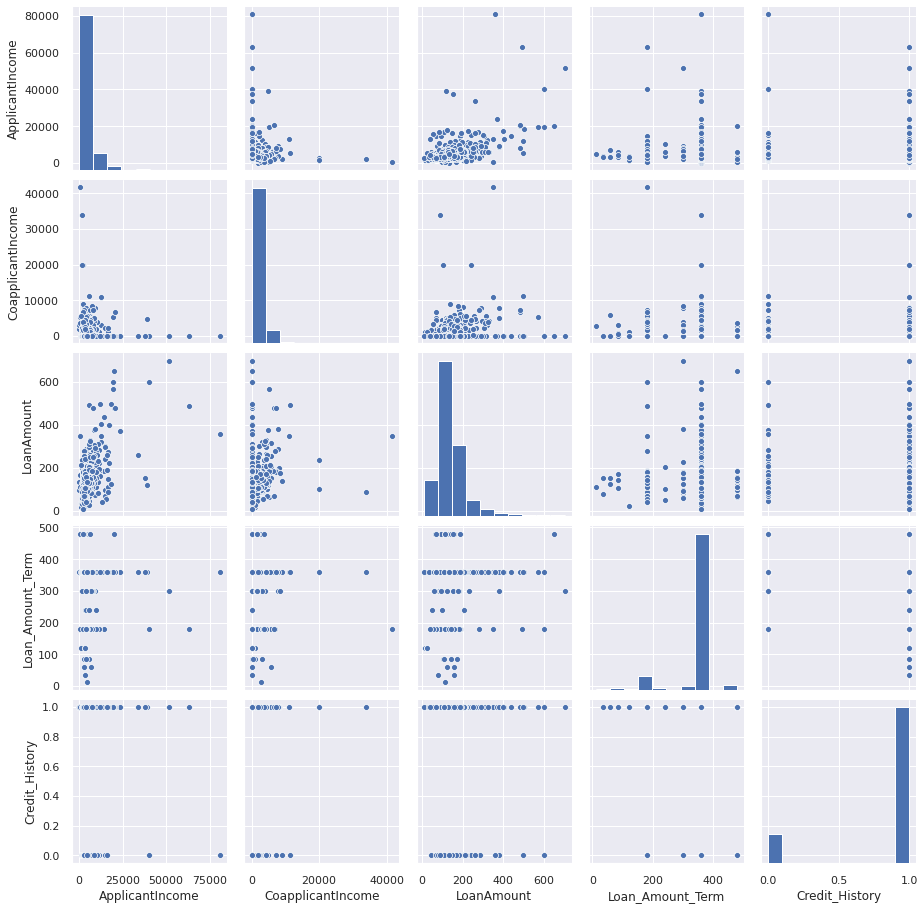

In [348]:
sns.pairplot(df)

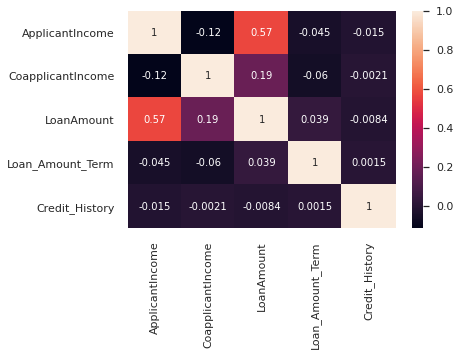

In [349]:
corr= df.corr()
sns.heatmap(corr, annot=True)